In [ ]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving sentiment1.csv to sentiment1.csv


{'sentiment1.csv': b"we have chosen dare not the most famous speeches that ends from celebrated while any crisis\r\nhe remembered this celebrated with the next day may have had to give a speech in public\r\nscroll down to the end of disposed for what essential tips\r\ni have a dream to the\r\ni have it\r\nwish should wish ill defined our iceland whatever the cost merely\r\nwe should fight on the beaches we still fight on the landing jones\r\nwhich i do not for the children body lavender\r\nwe shall never surrender and even if which a to not for the moment believe\r\ni made myself we take up arms and myself when we were generally does and any word of everyone of to barked at in the field\r\none of the really federal mobile to boy\r\none understand why not\r\nwould i looked at hello\r\nthat we both bob's jobs or what the lazy dogs wait\r\ni'm in illinois\r\nhello\r\ni am\r\ni'm good\r\nand bad\r\nthat we both have doubts about the lazy dogs\r\nthat\r\nquick\r\nbrown fox\r\nzones over the

In [ ]:
df=pd.read_csv("sentiment1.csv",sep="\t",names=["comment_name"])

In [ ]:
df

,comment_name
0,we have chosen dare not the most famous speech...
1,he remembered this celebrated with the next da...
2,scroll down to the end of disposed for what es...
3,i have a dream to the
4,i have it
5,wish should wish ill defined our iceland whate...
6,we should fight on the beaches we still fight ...
7,which i do not for the children body lavender
8,we shall never surrender and even if which a t...
9,i made myself we take up arms and myself when ...


In [ ]:
df1 = df[["comment_name"]]

In [ ]:
def cleanTxt(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text=text.lower()
    
    text=re.sub(r'[0-9\.]+', '',text)
    # text=[wordnet.lemmatize(word)for word in text if word not in set(stopwords.words('english'))]
    # text=' '.join(text)
    return text

In [ ]:
df["comment_name"] = df["comment_name"].apply(cleanTxt)

In [ ]:
data = pd.DataFrame(df["comment_name"])
data

,comment_name
0,we have chosen dare not the most famous speech...
1,he remembered this celebrated with the next da...
2,scroll down to the end of disposed for what es...
3,i have a dream to the
4,i have it
5,wish should wish ill defined our iceland whate...
6,we should fight on the beaches we still fight ...
7,which i do not for the children body lavender
8,we shall never surrender and even if which a t...
9,i made myself we take up arms and myself when ...


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 


#Create two new column 

data["Subjectivity"] = data["comment_name"].apply(getSubjectivity)
data["Polarity"] = data["comment_name"].apply(getPolarity)

data.head(28)

,comment_name,Subjectivity,Polarity,Analysis
0,we have chosen dare not the most famous speech...,0.750000,0.450000,Positive
1,he remembered this celebrated with the next da...,0.272222,0.116667,Positive
2,scroll down to the end of disposed for what es...,0.294444,-0.077778,Negative
3,i have a dream to the,0.000000,0.000000,Neutral
4,i have it,0.000000,0.000000,Neutral
5,wish should wish ill defined our iceland whate...,0.750000,-0.500000,Negative
6,we should fight on the beaches we still fight ...,0.000000,0.000000,Neutral
7,which i do not for the children body lavender,0.000000,0.000000,Neutral
8,we shall never surrender and even if which a t...,0.000000,0.000000,Neutral
9,i made myself we take up arms and myself when ...,0.500000,0.050000,Positive


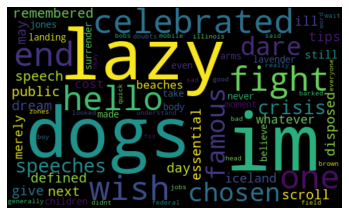

In [ ]:
allwords = ' '.join([words for words in data["comment_name"]])
wordCloud = WordCloud(width= 500, height=300, random_state=21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data["Analysis"] = data["Polarity"].apply(analysis)
data.head(28)

,comment_name,Subjectivity,Polarity,Analysis
0,we have chosen dare not the most famous speech...,0.750000,0.450000,Positive
1,he remembered this celebrated with the next da...,0.272222,0.116667,Positive
2,scroll down to the end of disposed for what es...,0.294444,-0.077778,Negative
3,i have a dream to the,0.000000,0.000000,Neutral
4,i have it,0.000000,0.000000,Neutral
5,wish should wish ill defined our iceland whate...,0.750000,-0.500000,Negative
6,we should fight on the beaches we still fight ...,0.000000,0.000000,Neutral
7,which i do not for the children body lavender,0.000000,0.000000,Neutral
8,we shall never surrender and even if which a t...,0.000000,0.000000,Neutral
9,i made myself we take up arms and myself when ...,0.500000,0.050000,Positive


In [ ]:
data["Analysis"].value_counts(normalize=True).to_frame().style.format('{:.6%}')

,Analysis
Neutral,48.275862%
Positive,27.586207%
Negative,24.137931%


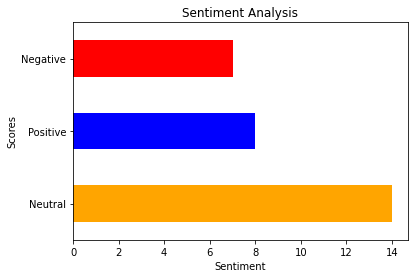

In [ ]:
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
data["Analysis"].value_counts().plot(kind="barh", color=['orange', 'blue', 'red'])
plt.show()